## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [48]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [49]:
#read dataset 
df = pd.read_csv("ab_data.csv")
df.head() #show first five rows in dataframe

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [50]:
print(f"num of rows = {df.shape[0]}")

num of rows = 294478


c. The number of unique users in the dataset.

In [51]:
unique_users =df.user_id.nunique()
print(f"number of unique users is {unique_users}")

number of unique users is 290584


d. The proportion of users converted.

In [52]:
user_converted = df.query(f"converted=={1}")
p_users_converted =user_converted.user_id.nunique()/unique_users
print("proportion of users converted." , p_users_converted)

proportion of users converted. 0.12104245244060237


e. The number of times the `new_page` and `treatment` don't match.

In [53]:
messy_new_page =df.query("landing_page=='new_page' and group =='control'")
messy_old_page=df.query("landing_page=='old_page' and group =='treatment'")
print("The number of times the new_page and treatment don't match" , \
     messy_new_page.shape[0]+messy_old_page.shape[0])

The number of times the new_page and treatment don't match 3893


f. Do any of the rows have missing values?

In [54]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No Missing values in DataFrame

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [55]:
index_messy_new = messy_new_page.index
index_messy_old = messy_old_page.index
droped_messy = index_messy_new.tolist()+index_messy_old.tolist()
len(droped_messy)

3893

In [56]:
df2=df.drop(index=droped_messy)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [57]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [58]:
unique_users=df2.user_id.nunique()
print("unique user_ids =" , unique_users)

unique user_ids = 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [59]:
df2.user_id.value_counts(ascending=False).head(1)

773192    2
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [60]:
df2.loc[df2["user_id"]==773192 , :]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


this user seem supported to a new page in two cases so it prefered to drop of 
of this two rows

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [61]:
print("data shape before drop duplicated rows" , df2.shape)
df2.drop_duplicates(inplace=True, subset=["user_id"])
print("data shape after drop duplicated rows" , df2.shape)

data shape before drop duplicated rows (290585, 5)
data shape after drop duplicated rows (290584, 5)


In [62]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [63]:
individual_converting=df2.query(f"converted=={1}")
p = individual_converting.shape[0]/df2.shape[0]
p

0.11959708724499628

In [64]:
print("probability of an individual converting regardless of the page they receive :",p)

probability of an individual converting regardless of the page they receive : 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [65]:
control_group = df2.query("group=='control'")
p=control_group.query(f"converted=={1}").shape[0]/control_group.shape[0]
p
#or using this line insted but i prefer to take subset from data 
#because it possiblt to use it to answer a specific question 
#df2.query("group == 'control'").converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [66]:
treatment_group = df2.query("group=='treatment'")
p=treatment_group.query(f"converted=={1}").shape[0]/treatment_group.shape[0]
p

0.11880806551510564

d. What is the probability that an individual received the new page?

In [67]:
df2.query("landing_page=='new_page'").shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

in the results we get probability of converted in control group is higher than probaility of converted in treatment group
that means conversions in old page is best we can improve in new page or make old as it be .

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: P_{old} - P_{new} >= 0$$


$$H_1: p_{old} - P_{new} < 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [68]:
p_new =df2.converted.mean()
print("conversion rate for  𝑝𝑛𝑒𝑤  under the null " , p_new)

conversion rate for  𝑝𝑛𝑒𝑤  under the null  0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [69]:
p_old=df2.converted.mean()
print("conversion rate for  𝑝𝑜𝑙𝑑  under the null " , p_old)

conversion rate for  𝑝𝑜𝑙𝑑  under the null  0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [70]:
n_new=treatment_group.shape[0]
print("number of new_page in dataframe " , n_new)

number of new_page in dataframe  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [71]:
n_old = control_group.shape[0]
print("number of old_page in dataframe " , n_old)

number of old_page in dataframe  145274


In [72]:
diff = p_new - p_old
diff

0.0

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [73]:
#it look like binomial distribution because all values are 0 or 1
new_page_converted = np.random.binomial(1 , p_new , n_new)
assert len(new_page_converted)==n_new

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [74]:
old_page_converted = np.random.binomial(1 , p_old , n_old)
assert len(old_page_converted)==n_old

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [75]:
diff = new_page_converted.mean() - old_page_converted.mean()
print("p_new - p_old in this experiement = " , diff)

p_new - p_old in this experiement =  0.00156721669303


It seems the old is better but we can make a lot of experiement to make sure 

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [76]:
new_converted = np.random.binomial(n_new ,p_new , 10_000)/n_new #make scalling
old_converted = np.random.binomial(n_old , p_old , 10_000)/n_old
p_diffs = new_converted-old_converted

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

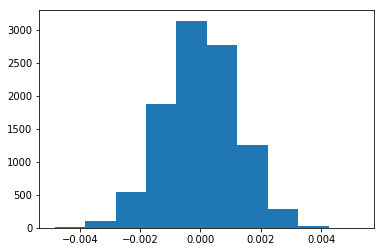

In [77]:
plt.hist(p_diffs)
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [78]:
#first we will get diff from our popilation 
actual_diff = df2.query("landing_page=='new_page'").converted.mean()-\
df2.query("landing_page=='old_page'").converted.mean()
actual_diff

-0.0015782389853555567

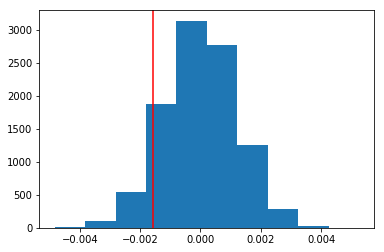

In [79]:
plt.hist(p_diffs)
plt.axvline(actual_diff , color ="r")
plt.show()

In [80]:
(p_diffs>actual_diff).mean() #p_value

0.90600000000000003

it seems we needn't to make a new page i think old is do the same result 

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer** 

-this value is P_value 

-when p value is large that means we accept H0 so the old page is significant statistics and also it greart than type 1 error rate (0.05) so we fail to reject H0

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [81]:
import statsmodels.api as sm

convert_old = df2.query("landing_page=='old_page'").converted.sum()
convert_new = df2.query("landing_page=='new_page'").converted.sum() 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [83]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new] ,  alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Ans:

`Z_score` is between -1.69 and 1.69 that means we fail to reject `H0` and also P_value in here and previous give the same 
answer there are a greater than 50% that make us more sure that we fail to reject `H0`

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

in this case we will use `logistic regression` because our target `converted` is binary it has one of two value 0 or 1
it is useful in this case to see which column influence the output

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [84]:
#we will used logistic regression because our target value is 0 or 1
df2["intercept"]=1
df2["ab_page"]=df2["group"].replace({"treatment":1 , "control":0})
#or using getdummis
#df2[["page" , "ab_page"]]=pd.get_dummis(df2["group"]);df2.drop("page" , axis=1 , inplace=True)

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [85]:
model = sm.Logit(df2["converted"] , df2[["intercept" , "ab_page"]])
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [86]:
display(res.summary2())

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-09-12 10:36 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

p value = 0.19 and it different than p value we get before

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

i think we will use a dataframe that contain name of country to know is country
is influenced or not?

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [87]:
country = pd.read_csv("countries.csv" , index_col="user_id")
df2.set_index("user_id" , inplace=True)
df2 = df2.join(country)
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [88]:
df2["country"].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [89]:
df2[["CA" , "UK" , "US"]]=pd.get_dummies(df2["country"])
model = sm.Logit(df2["converted"] , df2[["intercept" , "ab_page" , "CA" , "UK"]])
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [90]:
display(res.summary2())

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-09-12 10:39 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

it seems that countyr hasn't a significant statistics 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [91]:
df2['CA_page'] = df2['CA']*df2['ab_page']
df2['UK_page'] = df2['UK']*df2['ab_page']
df2['US_page'] = df2['US']*df2['ab_page']
model = sm.Logit(df2['converted'], df2[['intercept', 'CA_page', 'UK_page']])
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [92]:
display(res.summary2())

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-09-12 10:39 AIC:              212779.0384
No. Observations:   290584           BIC:              212810.7773
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9963    0.0062  -322.0487  0.0000  -2.0084  -1.9841
CA_page      -0.0752    0.0376    -1.9974  0.0458  -0.1489  -0.0014
UK_page       0.0149    0.0173     0.8617  0.3888  -0.0190   0.0488
==================================================================

"""

it seems the p of CA_page greater less than 0.05 it has a significant staistics 

<a id='conclusions'></a>
## Conclusion
we notice that we won't need to cancal old page and put new page insted it costs a lot of time and money and won't give a better view to users so 
from analysis and tests we do i see that ol


In [93]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0